In [1]:
# Navigate to appropriate directory
import os
while os.path.split(os.getcwd())[1] != "merlin-optical-sar":
    os.chdir("..")
    if os.getcwd() == "/":
        raise ValueError()

import numpy as np
import matplotlib.pyplot as plt

import utils.mvalab as mvalab
import utils.utils as utils
import utils.vistools as vistools

# Saclay

## Saclay OPT

In [2]:
saclayopt = mvalab.imz2mat('data/Saclay/TelecomParisOPT.IMA')

imz2mat : version janvier 2018.  Fichier à ouvrir : data/Saclay/TelecomParisOPT.IMA
Fichier .dim version longue (lecture 3eme parametre) 
Fichier .dim version longue (lecture 4eme parametre)
Dans ximaread : lecture du canal 0/3
image en .IMA
image en .IMA
Fichier .dim version longue (lecture 3eme parametre) 
Fichier .dim version longue (lecture 4eme parametre)
image en .ima  1024   1024   canaux: 3  verif :  1
1024 1024
-type U16
lecture de  data/Saclay/TelecomParisOPT.IMA  en quelconque 1024 1024 3  offset  0 <H 2  complex 0 blocksize 2097152
Boucle de lecture entre 0 et 3   sur 3 canaux
Lecture du canal 1/3
Données réelles. Nouvelle version de imz2mat  <H
Lecture du canal 2/3
Données réelles. Nouvelle version de imz2mat  <H
Lecture du canal 3/3
Données réelles. Nouvelle version de imz2mat  <H
retour tableau 3-D (1024x1024x3)



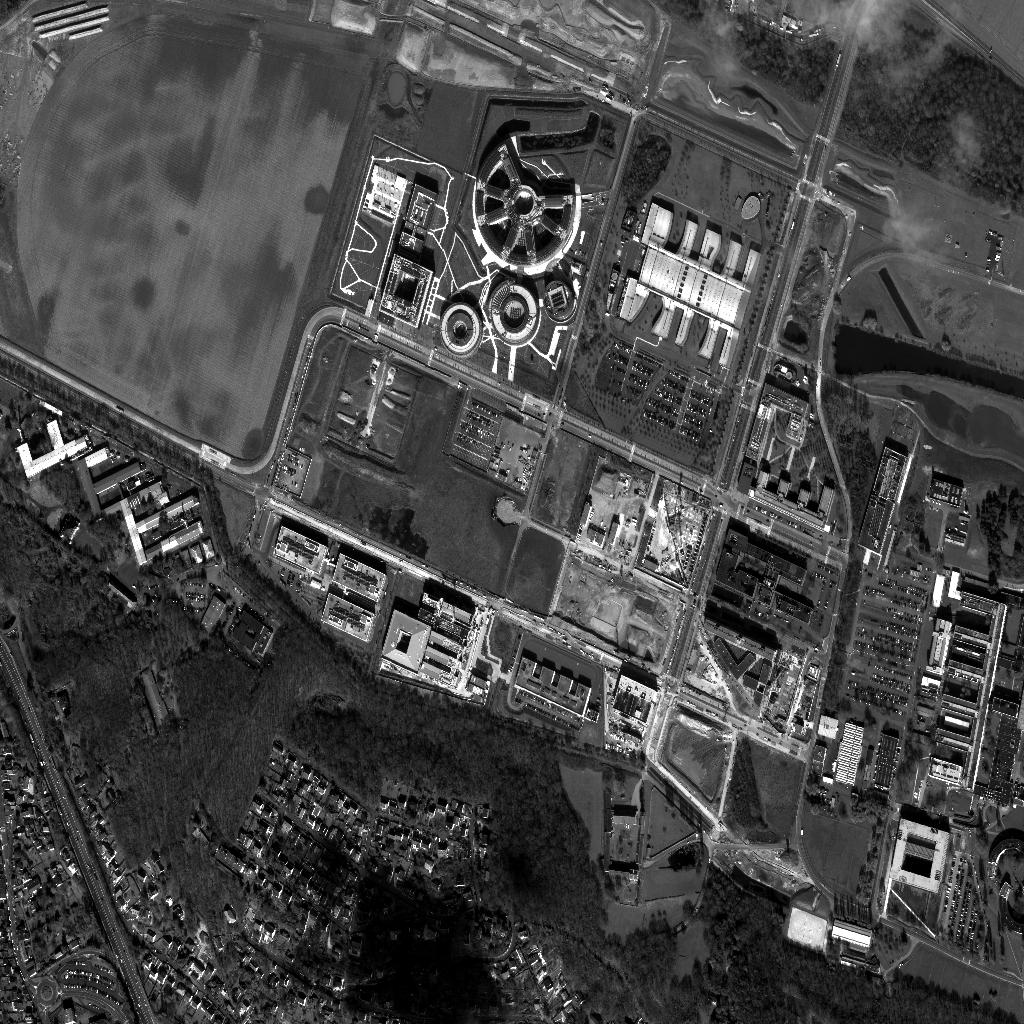
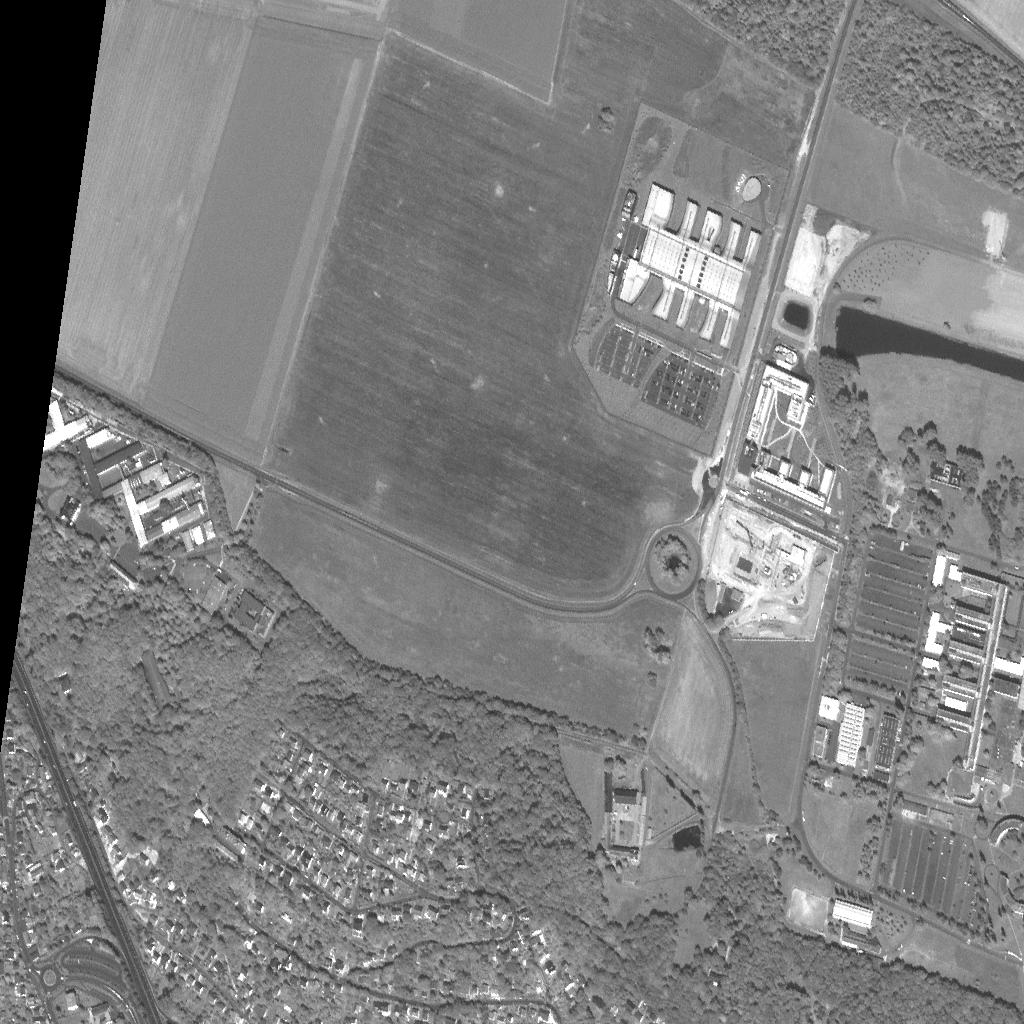
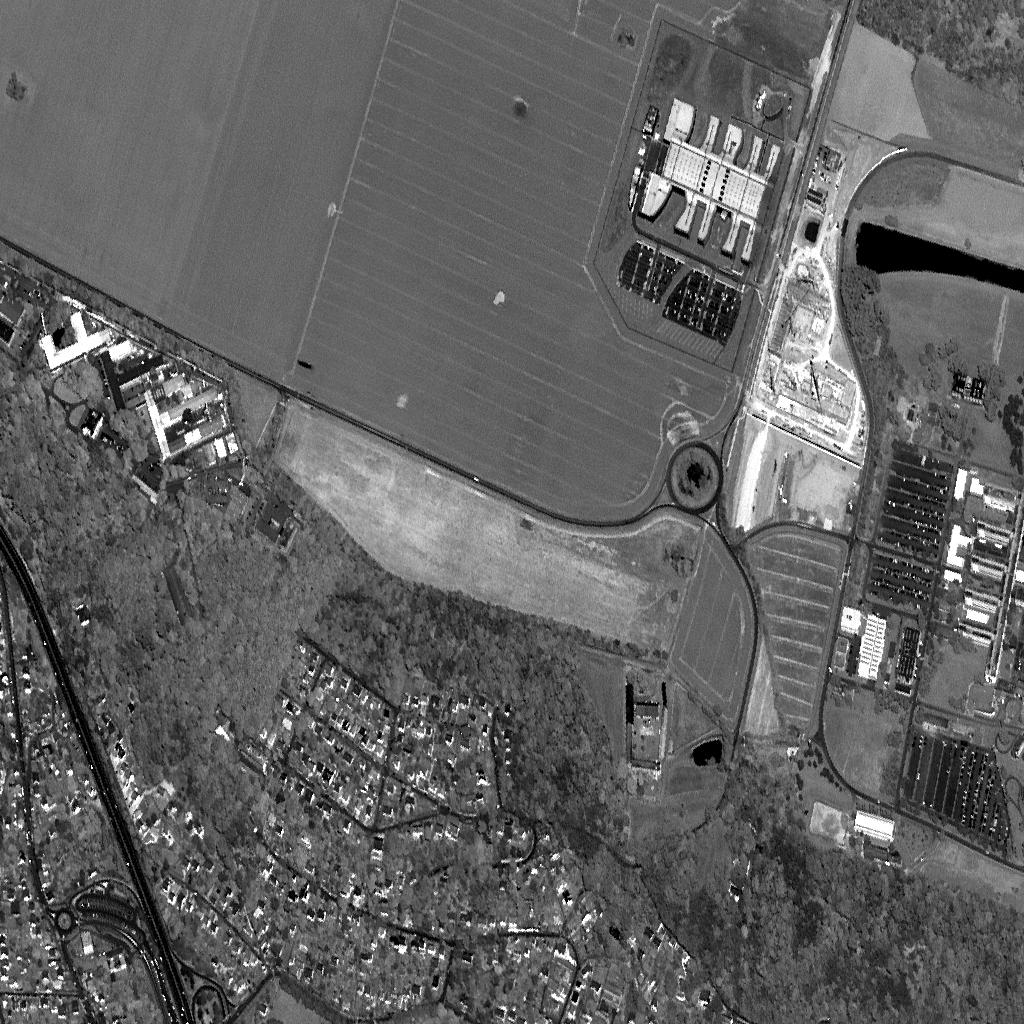

In [3]:
# vmax = 1000
# images = [np.clip(saclayopt[0][:, :, i], None, vmax) / vmax * 255 for i in range(3)]

images = [utils.simple_equalization_8bit(saclayopt[0][:, :, i], 1) for i in range(3)]

vistools.display_gallery(images)

## Saclay Z4

In [4]:
saclayz4 = mvalab.imz2mat('data/Saclay/TelecomParisZ4.IMA')

imz2mat : version janvier 2018.  Fichier à ouvrir : data/Saclay/TelecomParisZ4.IMA
Fichier .dim version longue (lecture 3eme parametre) 
Fichier .dim version longue (lecture 4eme parametre)
Dans ximaread : lecture du canal 0/5
image en .IMA
image en .IMA
Fichier .dim version longue (lecture 3eme parametre) 
Fichier .dim version longue (lecture 4eme parametre)
image en .ima  1024   1024   canaux: 5  verif :  1
1024 1024
-type CFLOAT
lecture de  data/Saclay/TelecomParisZ4.IMA  en quelconque 1024 1024 5  offset  0 <f 4  complex 1 blocksize 8388608
Boucle de lecture entre 0 et 5   sur 5 canaux
Lecture du canal 1/5
Données complexes (standard). Nouvelle version de imz2mat  <f
Lecture du canal 2/5
Données complexes (standard). Nouvelle version de imz2mat  <f
Lecture du canal 3/5
Données complexes (standard). Nouvelle version de imz2mat  <f
Lecture du canal 4/5
Données complexes (standard). Nouvelle version de imz2mat  <f
Lecture du canal 5/5
Données complexes (standard). Nouvelle version de 


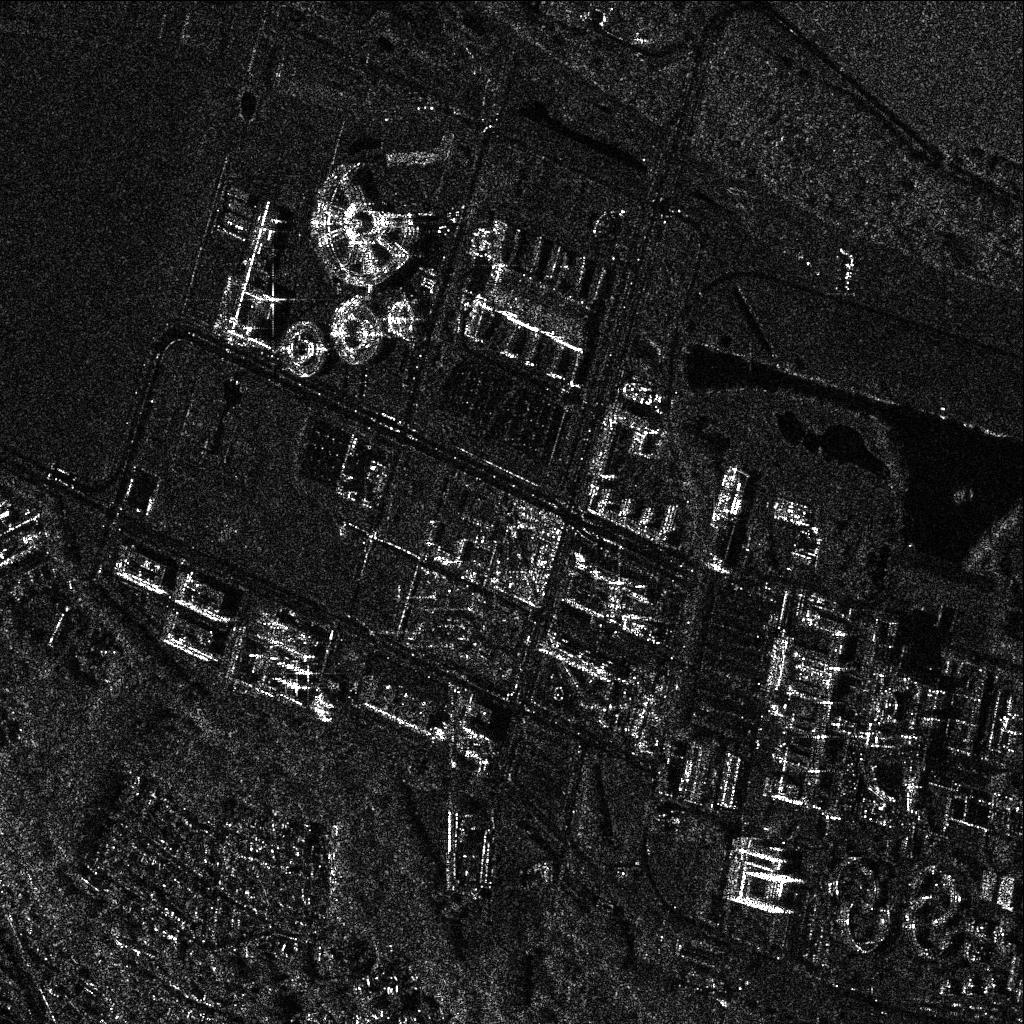
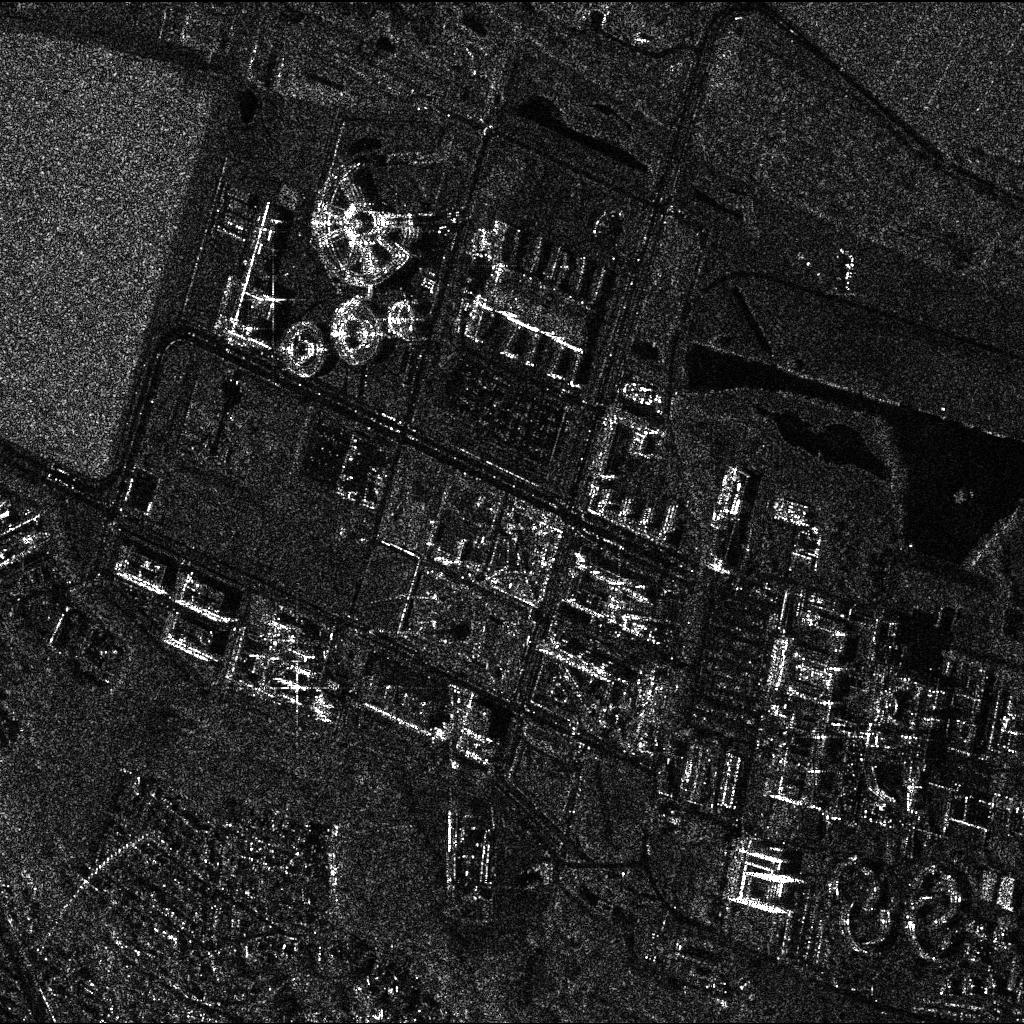
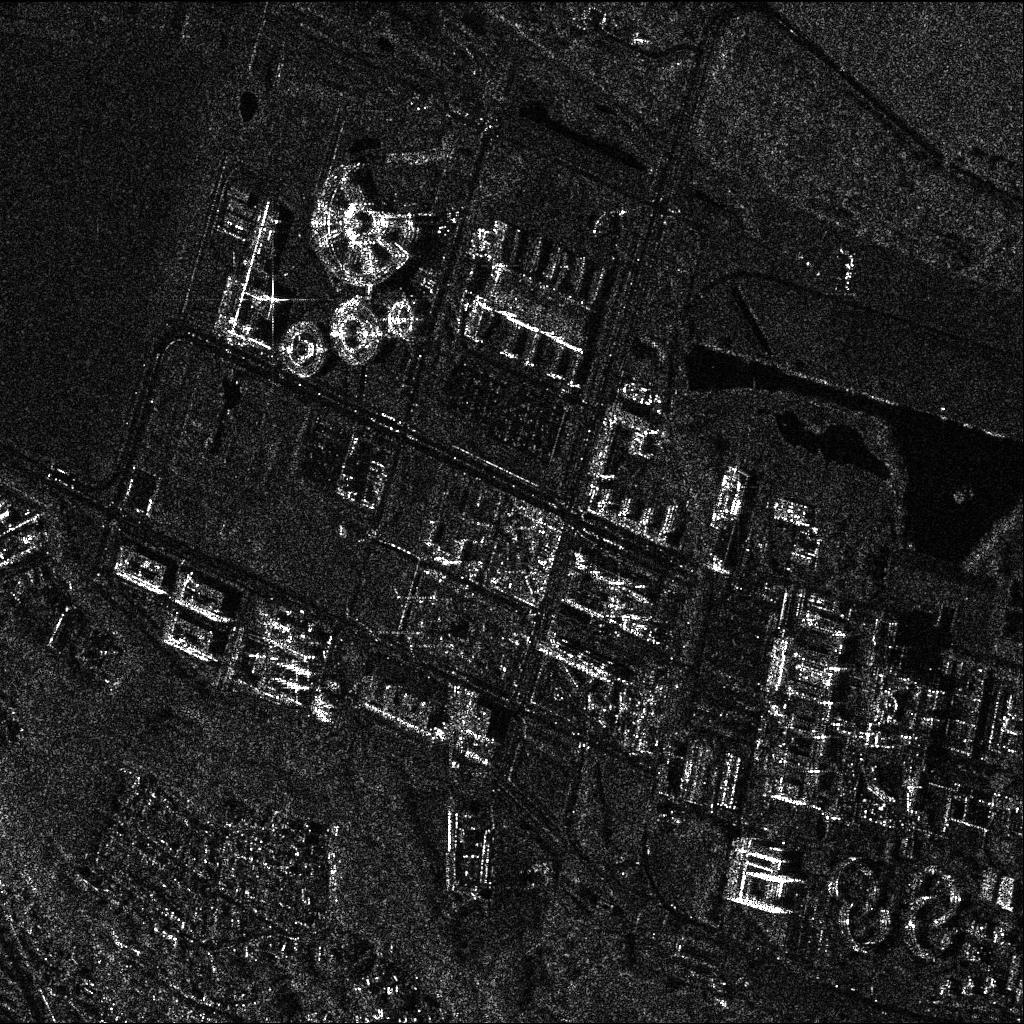
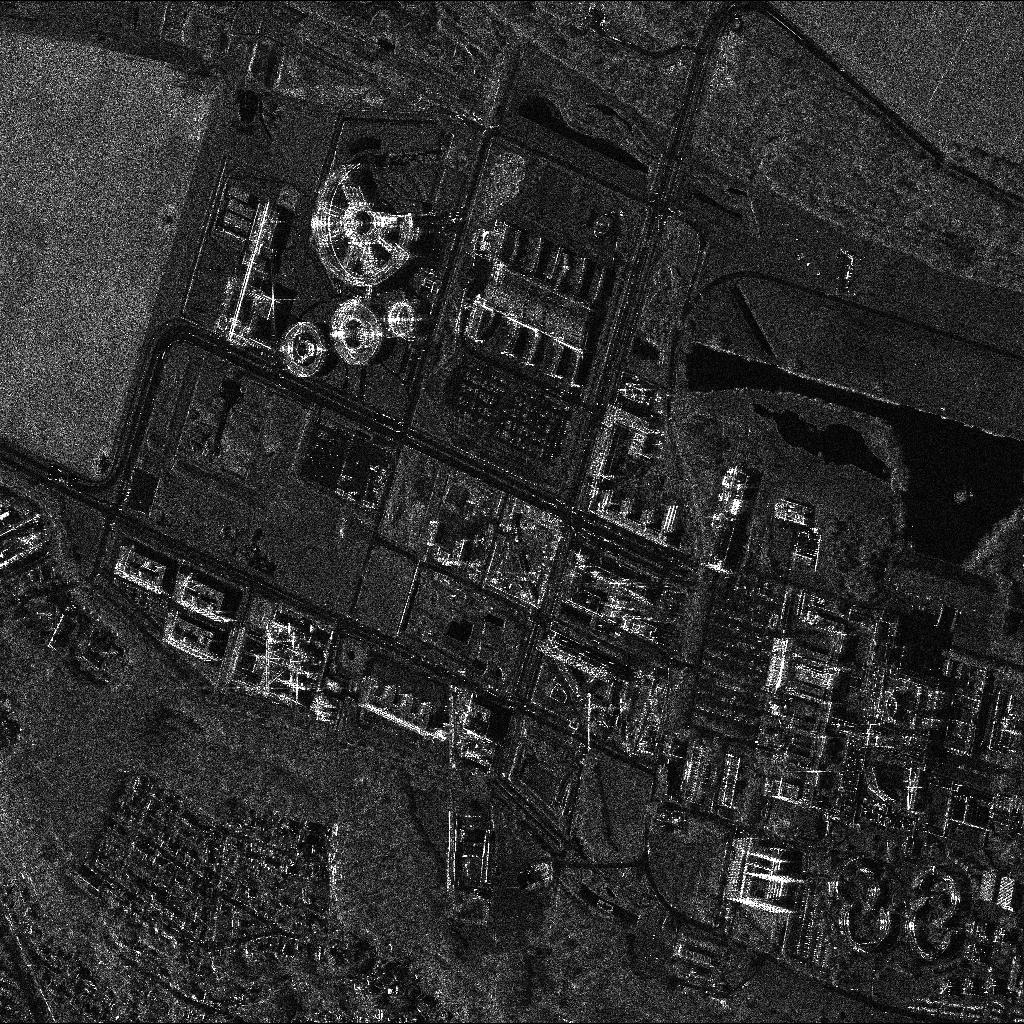
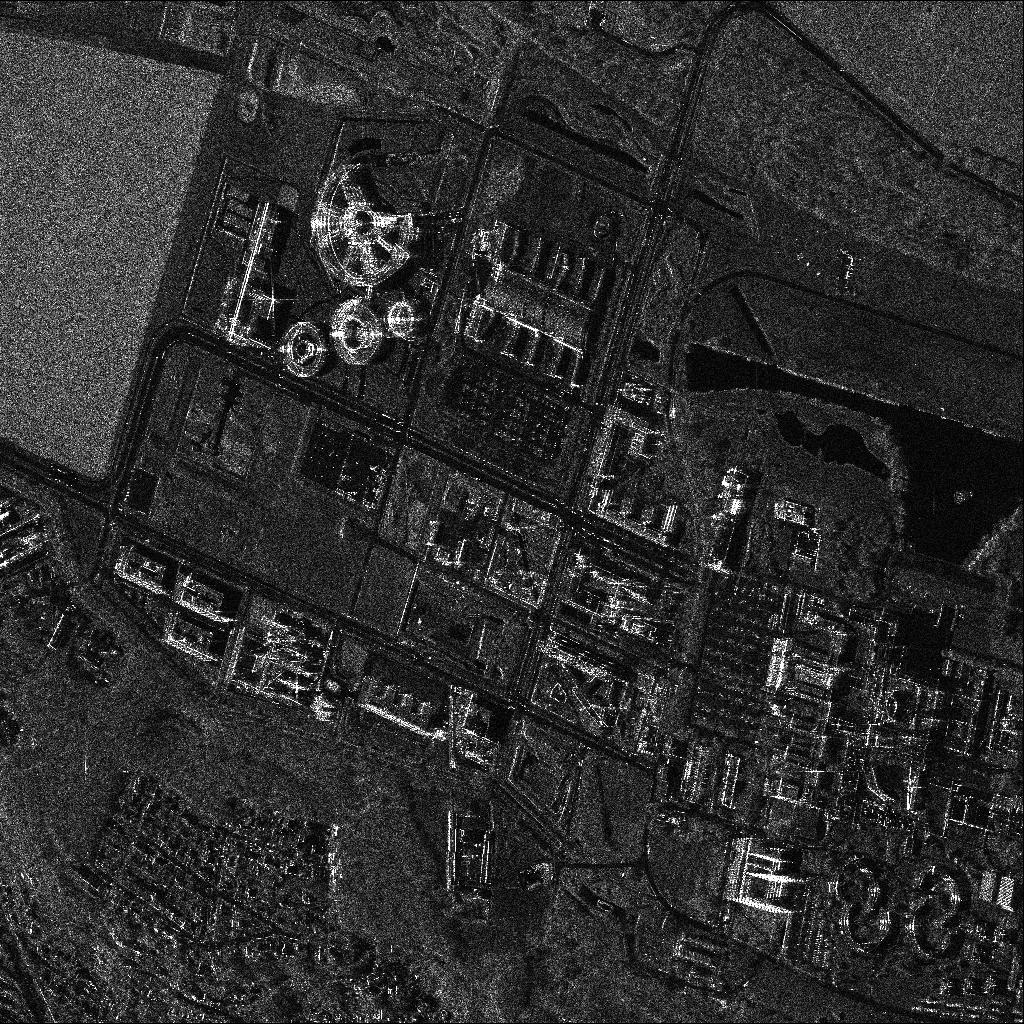

In [5]:
images = [utils.simple_equalization_8bit(np.abs(saclayz4[0][:, :, i]), 1) for i in range(5)]

vistools.display_gallery(images)

# Sendai

## Sendai OPT

In [6]:
sendaiopt = mvalab.imz2mat('data/Sendai/PileTSX_AVANT_surTSX_1024x1024RECALOPT.IMA')

imz2mat : version janvier 2018.  Fichier à ouvrir : data/Sendai/PileTSX_AVANT_surTSX_1024x1024RECALOPT.IMA
Fichier .dim version longue (lecture 3eme parametre) 
Fichier .dim version longue (lecture 4eme parametre)
Dans ximaread : image monocanal
Dans ximaread : lecture du canal 0/1
image en .IMA
image en .IMA
Fichier .dim version longue (lecture 3eme parametre) 
Fichier .dim version longue (lecture 4eme parametre)
image en .ima  1024   1024   canaux: 1  verif :  1
1024 1024
-type U16
lecture de  data/Sendai/PileTSX_AVANT_surTSX_1024x1024RECALOPT.IMA  en quelconque 1024 1024 1  offset  0 <H 2  complex 0 blocksize 2097152
Données réelles. Nouvelle version de imz2mat  <H


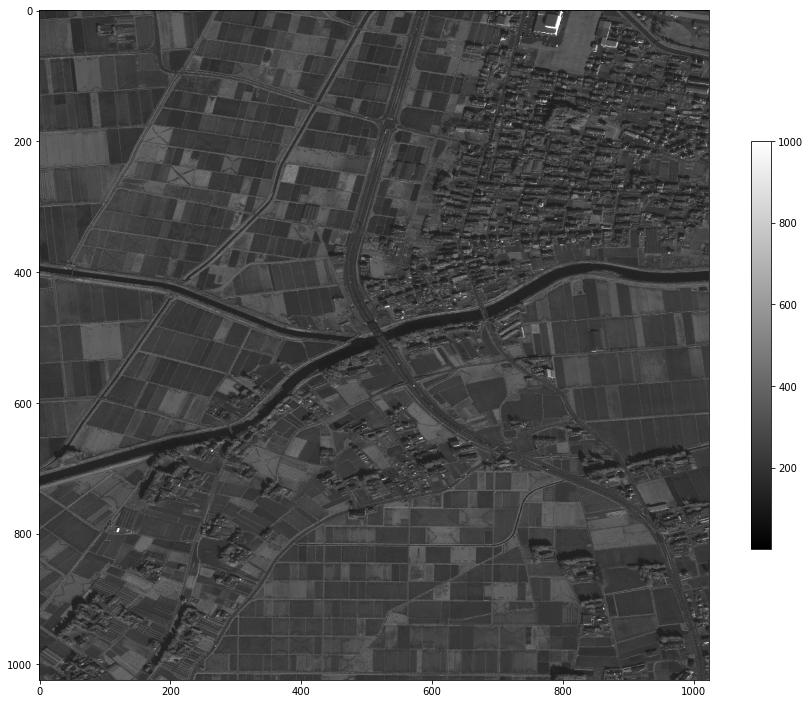

In [7]:
plt.figure(figsize=(15, 15))
plt.imshow(sendaiopt[0], vmax=1000, cmap='gray')
plt.colorbar(shrink=0.5)
plt.show()

## Sendai Z4

In [8]:
sendaiz4 = mvalab.imz2mat('data/Sendai/PileTSX_AVANT_surTSX_1024x1024RECALZ4.IMA')

imz2mat : version janvier 2018.  Fichier à ouvrir : data/Sendai/PileTSX_AVANT_surTSX_1024x1024RECALZ4.IMA
Fichier .dim version longue (lecture 3eme parametre) 
Fichier .dim version longue (lecture 4eme parametre)
Dans ximaread : lecture du canal 0/2
image en .IMA
image en .IMA
Fichier .dim version longue (lecture 3eme parametre) 
Fichier .dim version longue (lecture 4eme parametre)
image en .ima  1024   1024   canaux: 2  verif :  1
1024 1024
-type CFLOAT
lecture de  data/Sendai/PileTSX_AVANT_surTSX_1024x1024RECALZ4.IMA  en quelconque 1024 1024 2  offset  0 <f 4  complex 1 blocksize 8388608
Boucle de lecture entre 0 et 2   sur 2 canaux
Lecture du canal 1/2
Données complexes (standard). Nouvelle version de imz2mat  <f
Lecture du canal 2/2
Données complexes (standard). Nouvelle version de imz2mat  <f
retour tableau 3-D (1024x1024x2)



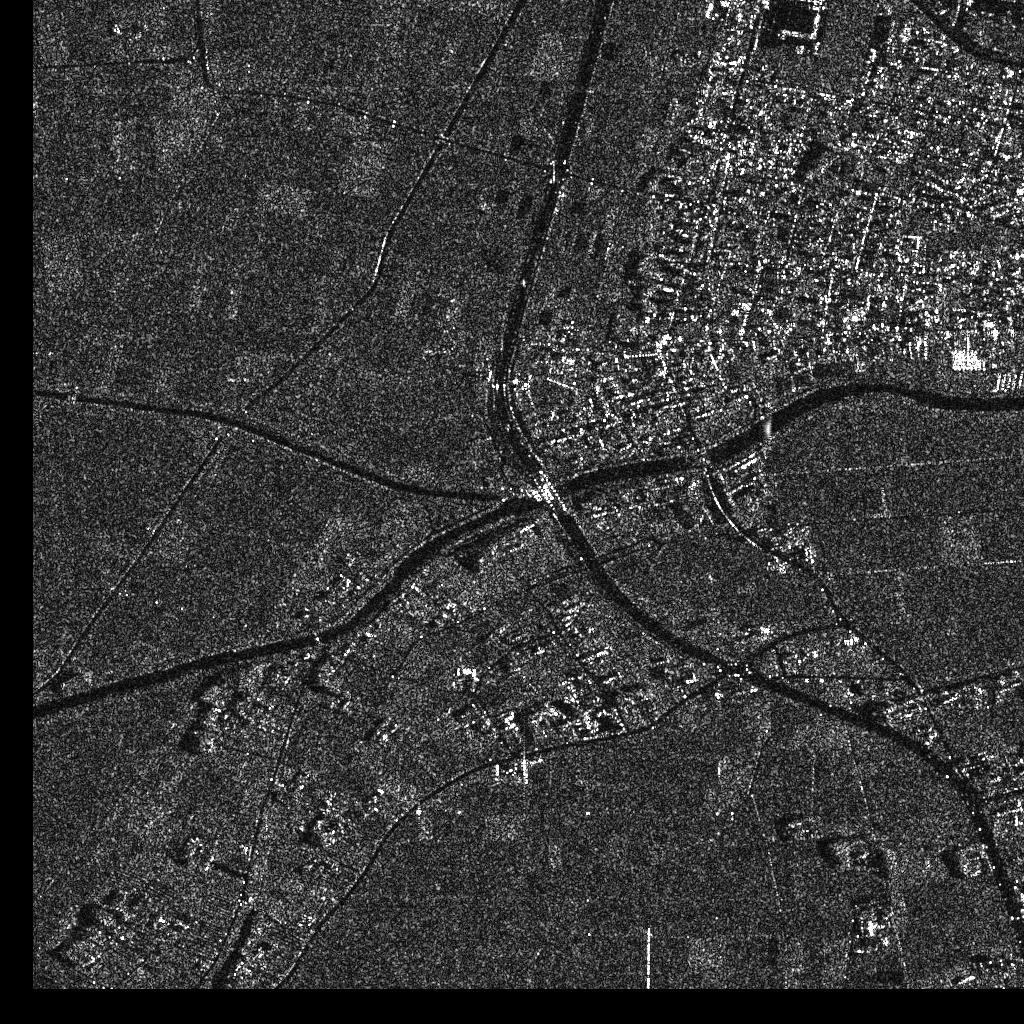
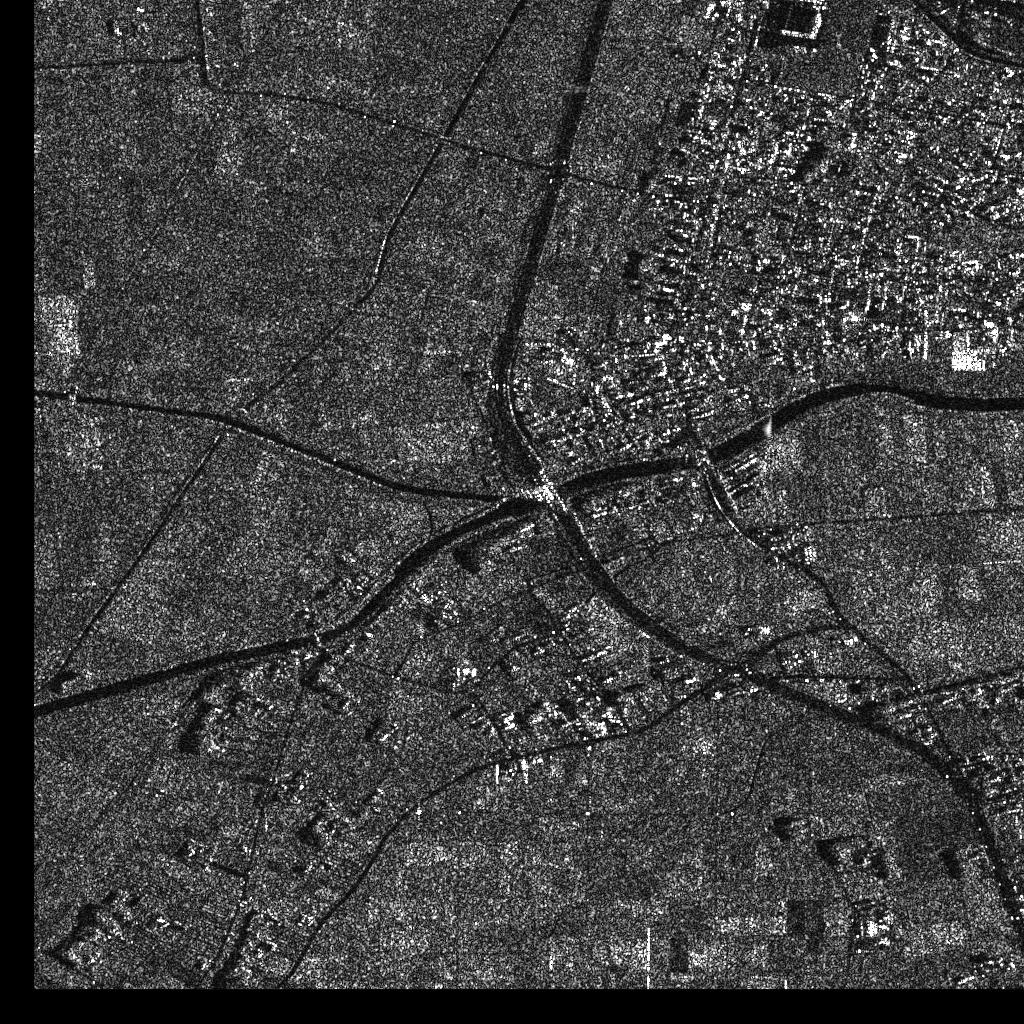

In [9]:
images = [utils.simple_equalization_8bit(np.abs(sendaiz4[0][:, :, i]), 1) for i in range(2)]

vistools.display_gallery(images)

# Registration

In [10]:
def compare(im1, im2):
    im1 = utils.simple_equalization_8bit(im1.astype(float), 1)
    im2 = utils.simple_equalization_8bit(im2.astype(float), 1)
    vistools.display_gallery([im1, im2])

## Saclay registration

In [11]:
opt0 = saclayopt[0][:, :, 0]
z40 = np.abs(saclayz4[0][:, :, 0])


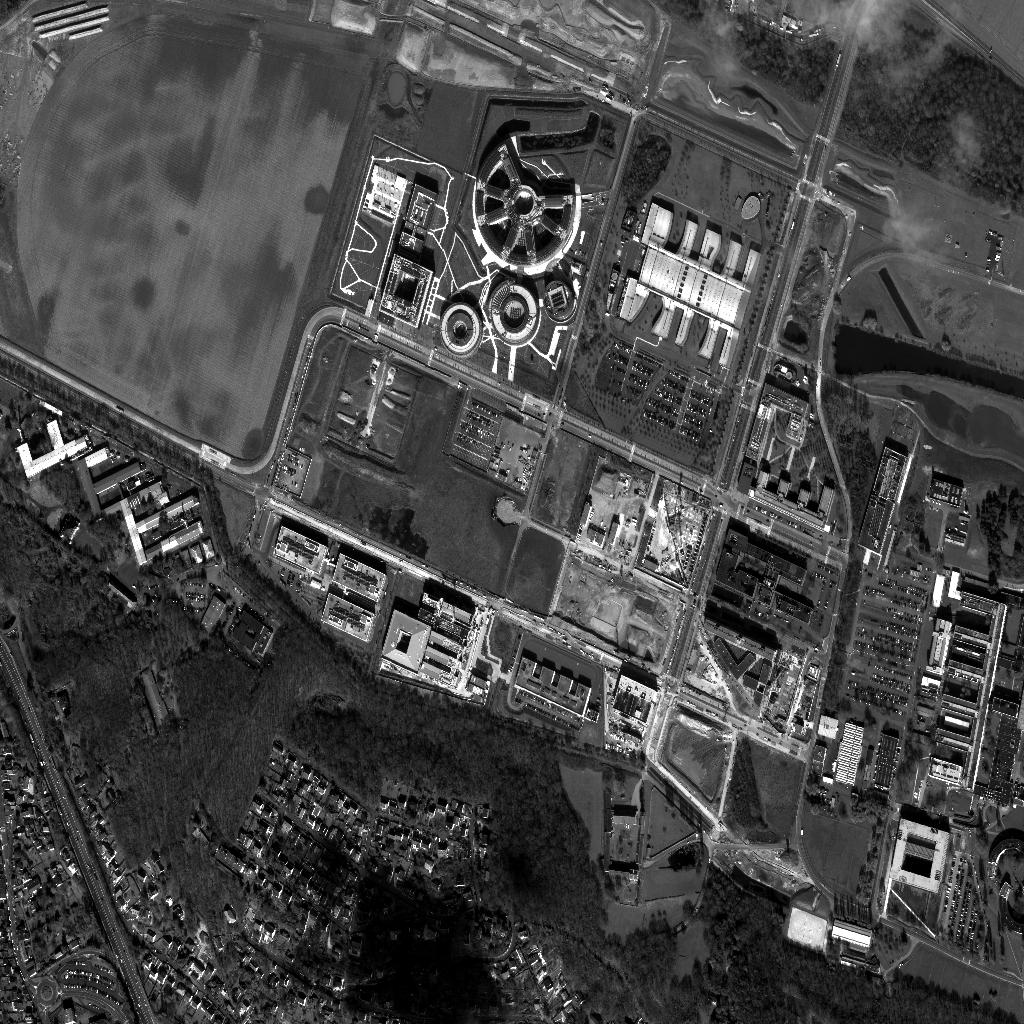
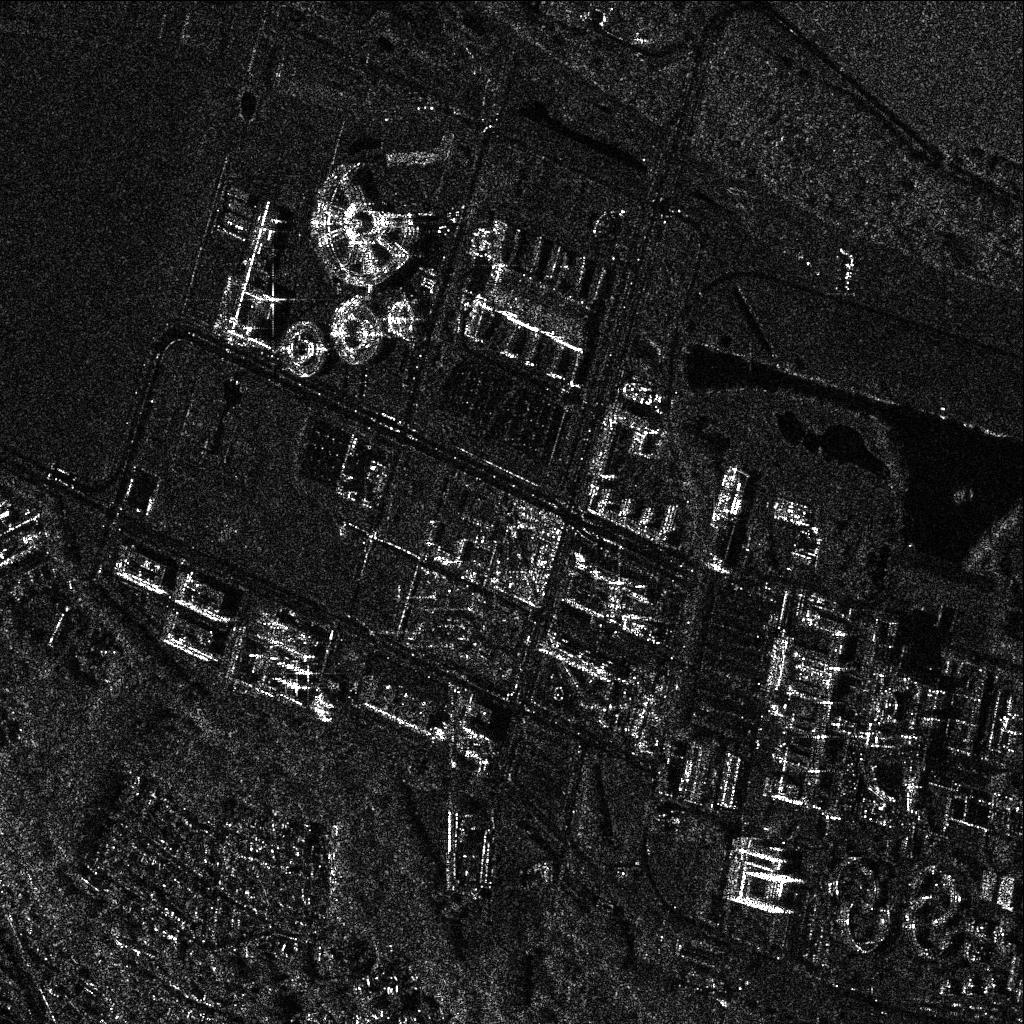

In [12]:
compare(opt0, z40)

In [13]:
corr = np.abs(np.fft.ifft2(np.fft.fft2(opt0) * np.conj(np.fft.fft2(z40))))

di, dj = np.unravel_index(np.argmax(corr), corr.shape)

print(di, dj)

1006 162


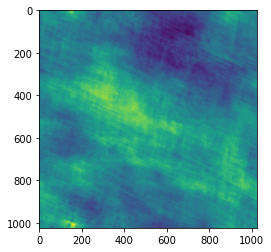

In [14]:
plt.imshow(corr)
plt.show()


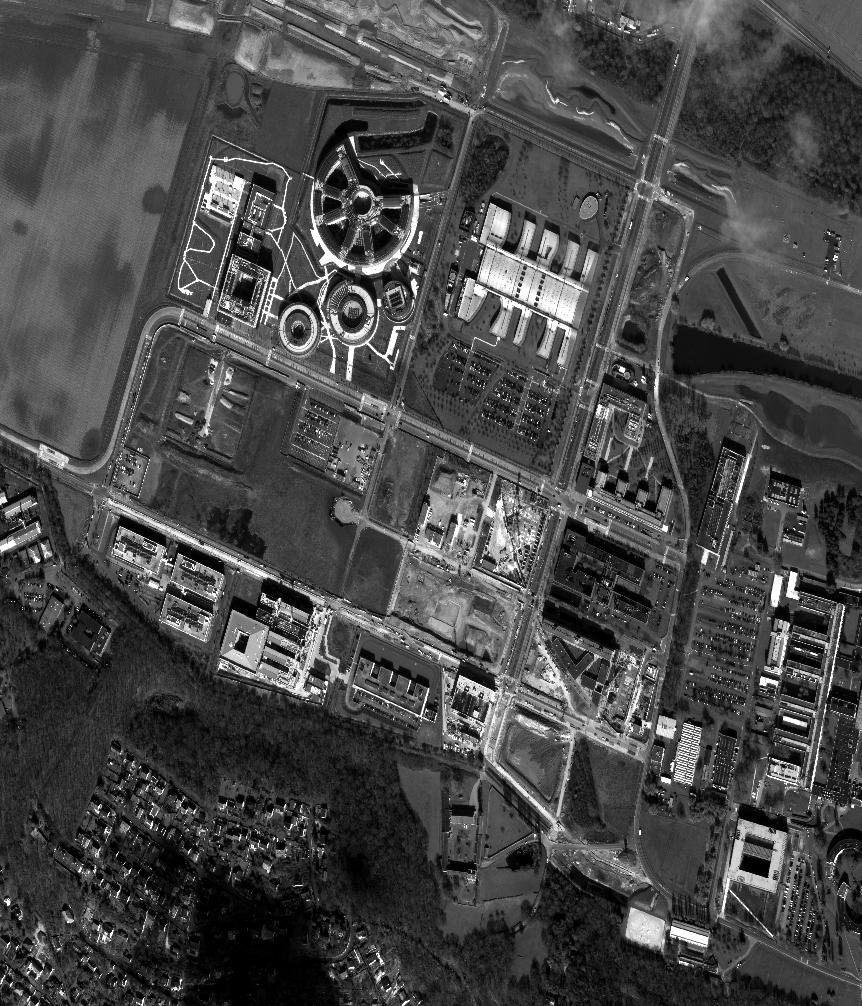
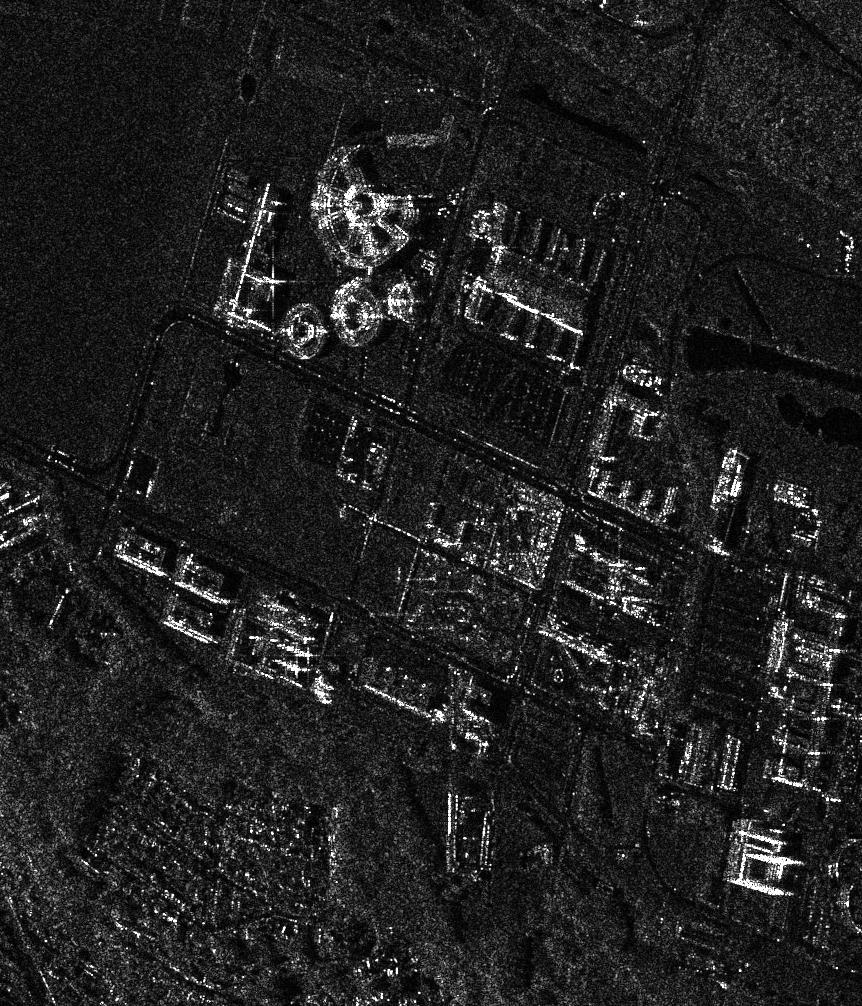

In [15]:
# vistools.display_gallery([opt0, np.roll(z40, [di, dj])])

opt0r = opt0[:di, dj:]
z40r = z40[1024-di:, :-dj]
compare(opt0r, z40r)

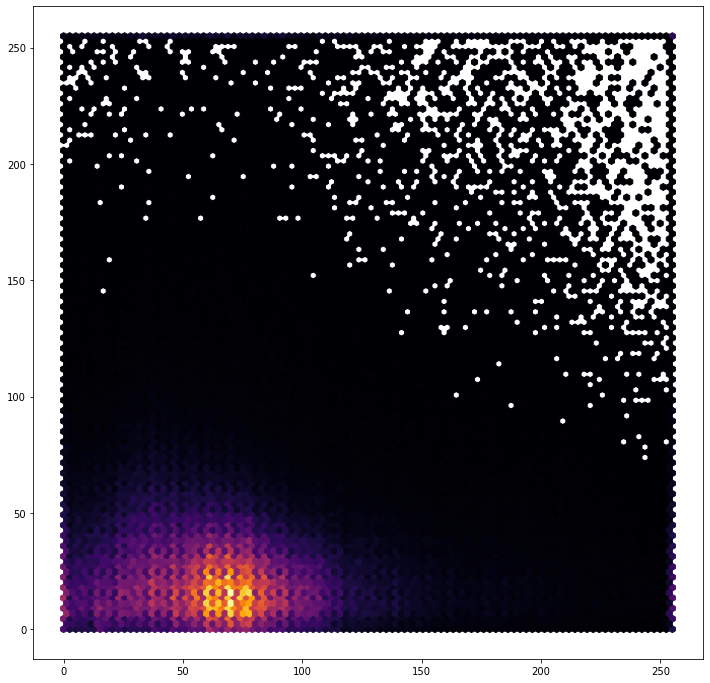

In [16]:
plt.figure(figsize=(12, 12))
plt.hexbin(
    utils.simple_equalization_8bit(opt0r, 1).flatten(), 
    utils.simple_equalization_8bit(z40r, 1).flatten(), 
    cmap='inferno', mincnt=1
)
plt.show()

## Sendai registration

In [17]:
opt0 = sendaiopt[0]
z40 = np.abs(sendaiz4[0][:, :, 0])


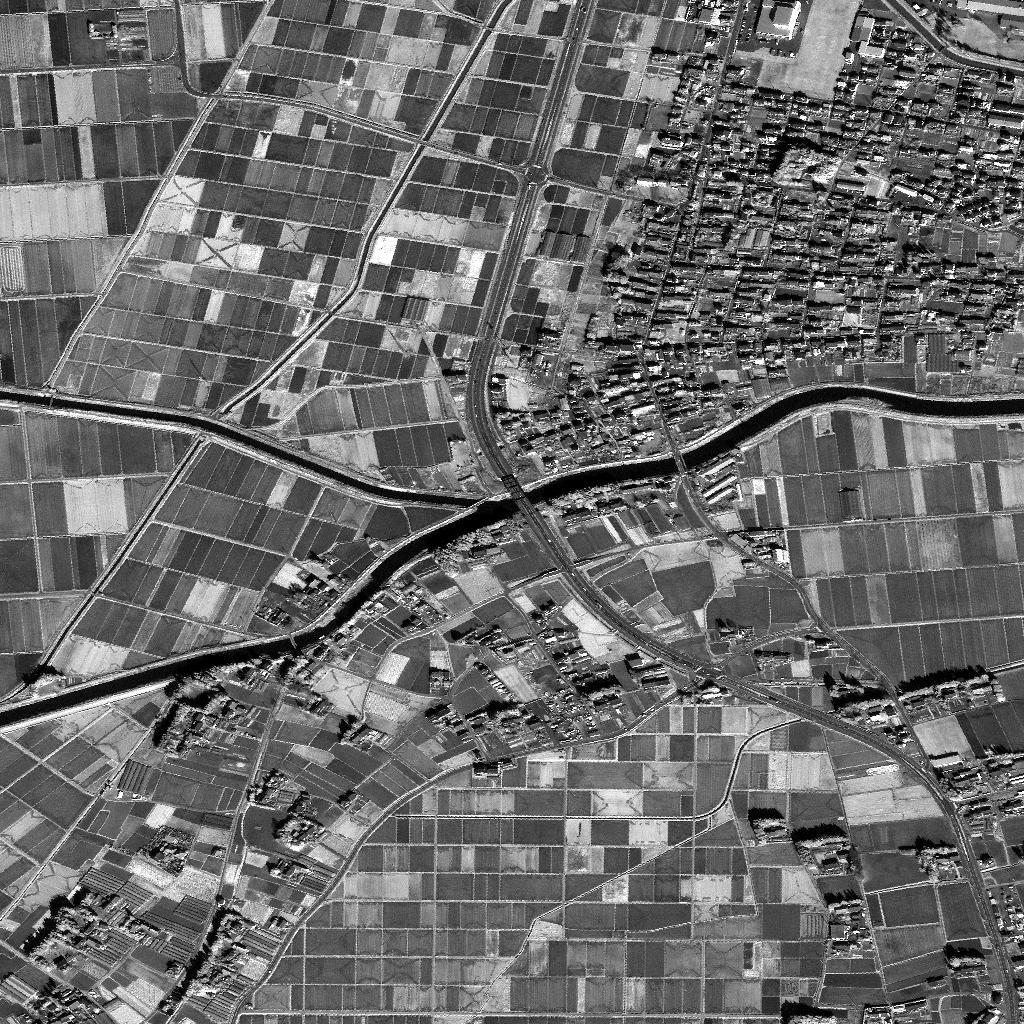
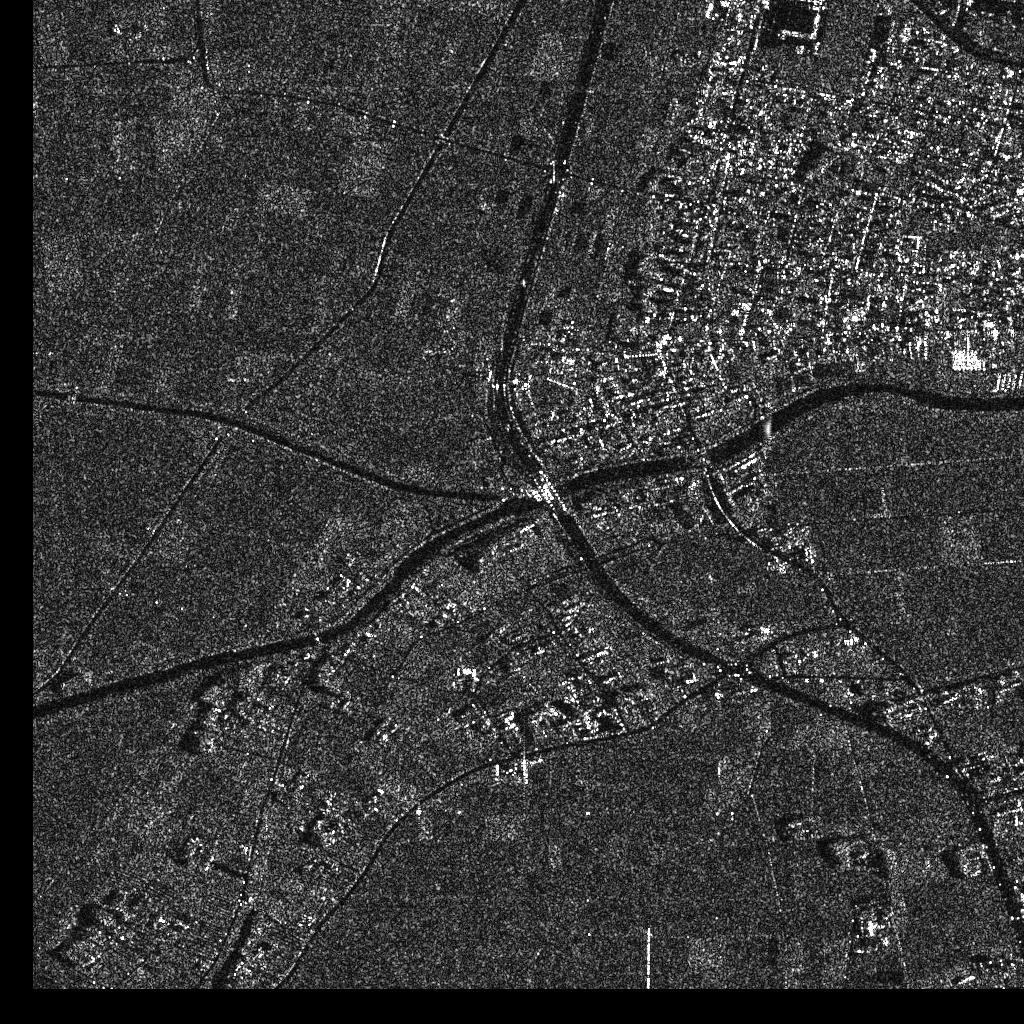

In [18]:
compare(opt0, z40)

In [19]:
corr = np.abs(np.fft.ifft2(np.fft.fft2(opt0) * np.conj(np.fft.fft2(z40))))

di, dj = np.unravel_index(np.argmin(corr), corr.shape)

print(di, dj)

1023 993


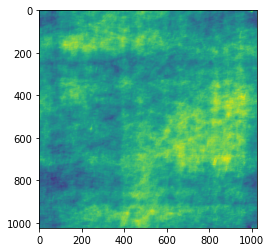

In [20]:
plt.imshow(corr)
plt.show()


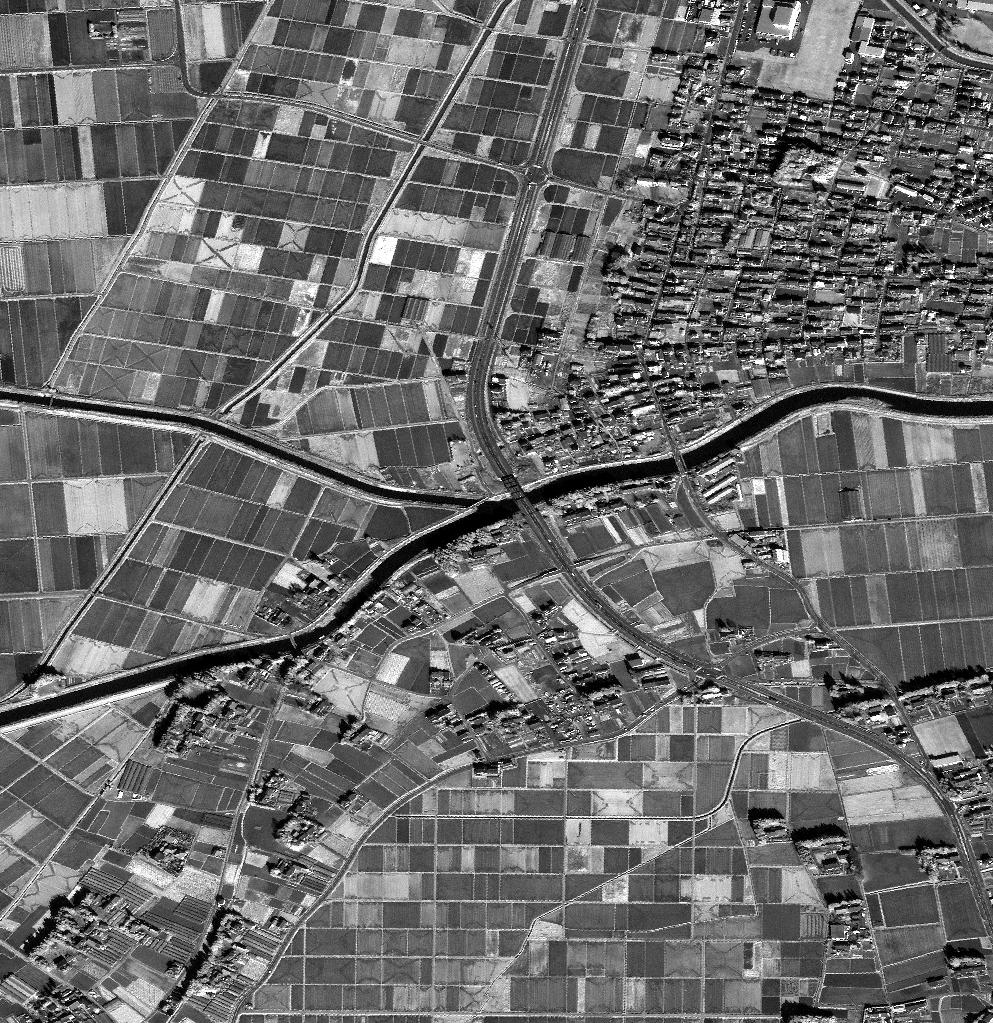
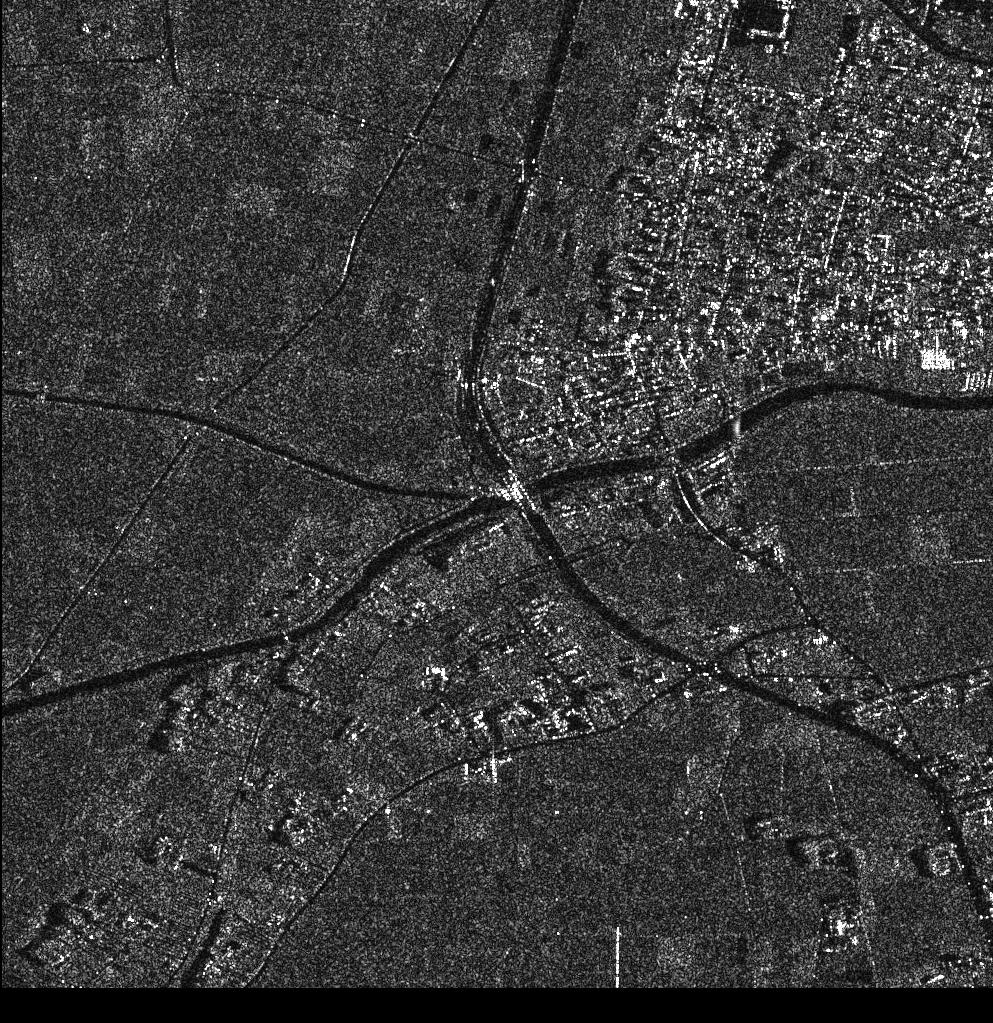

In [21]:
opt0r = opt0[:di, :dj]
z40r = z40[1024-di:, 1024-dj:]
compare(opt0r, z40r)

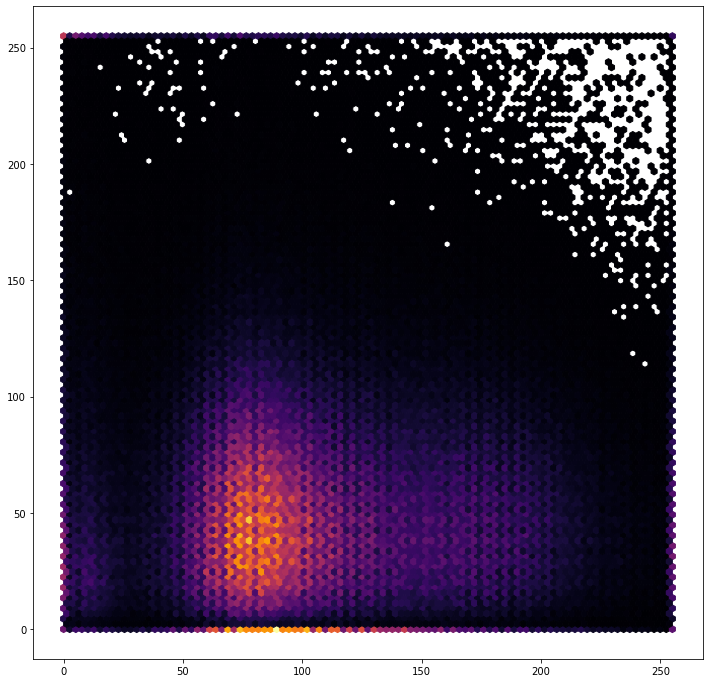

In [22]:
plt.figure(figsize=(12, 12))
plt.hexbin(
    utils.simple_equalization_8bit(opt0r, 1).flatten(), 
    utils.simple_equalization_8bit(z40r, 1).flatten(), 
    cmap='inferno', mincnt=1
)
plt.show()